#### ... to the only wise God!!!

### PET328 2024/2025

# Problem Set 1

## Introduction

The purpose of problem sets is to get you practise your programming and problem-solving skills with authentic tasks set in real-world contexts.

#### Purpose

Specifically, the objective of Problem Set 1 (PS1) is to get you to:
    
    - develop mastery in using GitHub tools to work collaboratively with others
    - practice working with basic objects in Python
    - construct short-structured codes with common building blocks: input-output, conditionals, repetitive loops, re-usable custom functions etc.

#### Context

PS 1 is based off an open-access Volve oilfield production dataset released to the public by Equinox (2018). It contained well parameters and daily production records for several wells spanning over 8 years. Essentially, PS1 tasks are your attempts to quickly familiarize yourself with the dataset. 

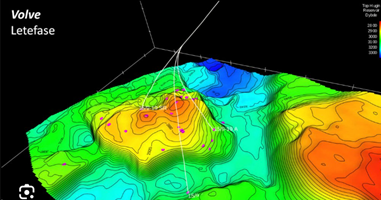

Equinor. 2018. Disclosing all Volve data. Available at https://www.equinor.com/news/archive/14jun2018-disclosing-volve-data

You will import the data as a _comma separated value (csv)_ file from the course GitHub repository and extract some basic information from the dataset. Furthermore, you will also extract some subsets of the data for further exploration. Your knowledge of basic concepts such as values, variables, data types, input-output statements, and simple execution (conditional and repetitive) flow structures will be required here.

#### Relevance

Real-life projects are built around teams with members collaboratively sharing files hoisted on distributed version control systems such as GitHub. Virtually all computer programs share a set of basic common features such as input-output statements, conditional execution, repetitive execution and code abstraction (user-defined functions).

## Access File Problem File

You are to work on the Jupyter Notebook (.ipynb) version of this file. It is available at the PET328_Class_2025 GitHub repository: https://github.com/TTOWG/PET328_Class_2025

**Task 0**

Fork and clone the repository to your computer. This will give you access to the _'PET328 Problem Set 1.ipynb'_ file for this problem set. Open the file in Jupyter environment.

## 1. Import Dataset

The dataset for this PS is available on the course GitHub repository as '*volve_welldata.csv* file. The pandas library needed to handle tabular data is here imported for you

In [1]:
import pandas as pd

**Task 1.1**

Navigate to the data file on GitHub, click on 'Raw' and copy the url from the address bar. Create a string object with the copied url and assign it a variable name of your choice.

In [2]:
# Your code here
volve_welldata = "https://raw.githubusercontent.com/TTOWG/PET328_Class_2025/81df69bfd2e5e36e58f005d6cc591d17a14911f0/volve_welldata.csv"

**Task 1.2**

With the string object you created in Task 1, import the data file as a pandas dataframe object; assign the object to a variable name of your choice. 

In [3]:
# Your code here
volve_welldata = pd.read_csv(volve_welldata)

## 2. Get Basic Dataset Information

The first concern after importing a dataset is to get basic information about it: dimensions, data types, etc. In the following tasks, you will write interactive Python scripts to obtain and report the basic information.

**Task 2.1**

Construct a loop that obtains and nicely reports the dimension(s) of the dataset: number of rows, or number of columns, or both. Your script should give users the benefit of indicating which of the dimension(s) is desired to be obtained. Lists (collections of elements) of rows and columns of the dataset has been provided for you (as *rows_list* and *cols_list* in the cell below.

In [ ]:
# List of rows:
rows_list = [row for row in volve_welldata.itertuples()]

# List of columns:
cols_list = list(volve_welldata)

# Your code here:
user_input = input("What dimension would you like to know? (rows/columns/both)\n")
while True:
    if user_input == 'rows':
        print(f'The dimension of the rows is {len(rows_list)}')
        break
    elif user_input == 'columns':
        print(f'The dimension of the columns is {len(cols_list)}')
        break
    elif user_input == 'both':
        print(f'The dimension of the rows and columns are {len(rows_list)} and {len(cols_list)}')
        break
    else:
        print(f'Invalid input')
    

Sometimes, you may want to apply an numeric operation across only numeric columns, excluding non-numeric columns. At such time, it is desired to know the data type (numeric or non-numeric) in each column of the data.

**Task 2.2**
Construct a loop that obtains and nicely reports the data type in each of the columns of the dataset. The list of the column headings have been generated for you (as *col_names* in the cell below.

In [35]:
col_names = volve_welldata.columns

# Your code here
for col in volve_welldata.columns:
    print(f"Column '{col}' has data type: {volve_welldata [col].dtype}")

Column 'Date of Production' has data type: object
Column 'Wellbore name' has data type: object
Column 'ON_STREAM_HRS' has data type: float64
Column 'AVG_DOWNHOLE_PRESSURE' has data type: float64
Column 'AVG_DOWNHOLE_TEMPERATURE' has data type: float64
Column 'AVG_DP_TUBING' has data type: float64
Column 'AVG_ANNULUS_PRESS' has data type: float64
Column 'AVG_CHOKE_SIZE_P' has data type: float64
Column 'AVG_CHOKE_UOM' has data type: object
Column 'AVG_WHP_P' has data type: float64
Column 'AVG_WHT_P' has data type: float64
Column 'DP_CHOKE_SIZE' has data type: float64
Column 'BORE_OIL_VOL' has data type: float64
Column 'BORE_GAS_VOL' has data type: float64
Column 'BORE_WAT_VOL' has data type: float64
Column 'BORE_WI_VOL' has data type: float64
Column 'FLOW_KIND' has data type: object
Column 'WELL_TYPE' has data type: object


## 3. Detect Coulmns with Missing Values

In reality, datasets do not come clean! There are always issues to address before analyzing or modelling the data. One of such is the issue of missing values in some rows/columns of the dataset. Handling this typically begins with detecting columns of the dataset with missing values, and enumerating how many rows in such columns are missing values. Once detected and enumerated, rows with missing values are handled either by deleting or by filling up. This section of the PS addresses the detection and enumeration. Section 5 of the PS adrresses the handling.

**Task 3.1**

Develop a script to detect and enumerate the number of rows with missing value in a user-specified column of the dataset.

Hint: you will need to figure out how to access the specific column of interest to the user, and how to test if a value is missing - Python uses NaN to denote missing values.

In [36]:
import numpy as np

# Your code here
volve_welldata = pd.DataFrame(volve_welldata)
def detect_missing_values(df):
    while True:
        user_input = input("Enter the column name to check for missing values: ").strip()

        if user_input in df.columns:
            missing_count = df[user_input].isna().sum()
            print(f"The column '{user_input}' has {missing_count} missing values.")
            break
        else:
            print("Invalid column name. Please enter a valid column name.")

detect_missing_values(volve_welldata)

Enter the column name to check for missing values:  BORE_OIL_VOL


The column 'BORE_OIL_VOL' has 6473 missing values.


## 4. Subset data for specific well

The volve production dataset contains records for multiple wells. It may be desirable to extract rows of data for a subset  (one or more) wells. 

**Task 4.1**

Develop a script that will extract all rows of data pertaining to a user-specified well. The names of the wells are displayed below for you.

Hint: you will need to figure out how to iterate through rows of a dataframe; also, you need to figure out how to aggregate rows into a new (initially empty) object.

In [27]:
volve_welldata['Wellbore name'].unique()

array(['15/9-F-1 C', '15/9-F-11 H', '15/9-F-12 H', '15/9-F-14 H',
       '15/9-F-15 D', '15/9-F-4 AH', '15/9-F-5 AH'], dtype=object)

In [44]:
# Your code here
well_name = input("Enter the well name to extract data: ").strip()
subset_data = volve_welldata[volve_welldata['Wellbore name'] == well_name]
print(subset_data)

Enter the well name to extract data:  15/9-F-15 D


     Date of Production Wellbore name  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
8023          12-Jan-14   15/9-F-15 D            0.0                303.747   
8024          13-Jan-14   15/9-F-15 D            0.0                303.955   
8025          14-Jan-14   15/9-F-15 D            0.0                303.377   
8026          15-Jan-14   15/9-F-15 D            0.0                304.405   
8027          16-Jan-14   15/9-F-15 D           24.0                241.771   
...                 ...           ...            ...                    ...   
8996          13-Sep-16   15/9-F-15 D            0.0                345.907   
8997          14-Sep-16   15/9-F-15 D            0.0                345.907   
8998          15-Sep-16   15/9-F-15 D            0.0                345.907   
8999          16-Sep-16   15/9-F-15 D            0.0                345.907   
9000          17-Sep-16   15/9-F-15 D            0.0                345.907   

      AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_

## 5. Handling Missing Values

With data for a specific well extracted, it is now okay to handle missing values for that specific well. One way to do that is to fill every row having missing values with average value of other rows having values. 

**Task 5.1**

Develop a script that can fill up all missing values with average of non-missing values, for a column specified by the user. Your script should internally compute and report the average value. Ensure your script include a way of showing that there are no more rows with mising values after the fill-up.

In [45]:
# Your code here
def fill_missing_values(df):
    col_name = input("Enter the column name to fill missing values: ").strip()
    
    if col_name in df.columns:
        # Calculate the mean of the column, ignoring NaN values
        average_value = df[col_name].mean()
        
        # Fill missing values with the calculated average
        df[col_name].fillna(average_value, inplace=True)
        
        print(f"Filled missing values in '{col_name}' with average: {average_value}")
        print("No more missing values:", df[col_name].isna().sum() == 0)
    else:
        print(f"Invalid column name: '{col_name}'. Please enter a valid column name from the following list:")
        print(df.columns.tolist())

# Example usage
fill_missing_values(volve_welldata)

Enter the column name to fill missing values:  AVG_DOWNHOLE_TEMPERATURE


Filled missing values in 'AVG_DOWNHOLE_TEMPERATURE' with average: 77.16296982182627
No more missing values: True


C:\Users\USER\AppData\Local\Temp\ipykernel_8156\3830439487.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col_name].fillna(average_value, inplace=True)


## 6. Abstract details away - create re-usable codes

What do you notice about your codes for Sections 3 and Section 5?

**Task 6.1**

Evaluate (by comparing) your submissions in Sections 3 and 5. Do you think you could do better? Do you think there is a need to create a custom function? Justify the need, if there is.

**Your answer here:**

Yes, creating custom functions for repetitive tasks makes the code cleaner and more modular. It enhances readability and allows for easier maintenance and debugging.

**Task 6.2**

Create a custom function that return the number of missing rows in a specified column of a dataset. Apply your function to execute the Task 3.1

In [46]:
# Your code here
def count_missing_rows(df, column_name):
    if column_name in df.columns:
        return df[column_name].isna().sum()
    else:
        return "Invalid column name."

# Example usage
column_name = input("Enter the column name to check missing rows: ").strip()
missing_count = count_missing_rows(volve_welldata, column_name)
print(f"Number of missing rows in '{column_name}': {missing_count}")



Enter the column name to check missing rows:  AVG_DOWNHOLE_TEMPERATURE


Number of missing rows in 'AVG_DOWNHOLE_TEMPERATURE': 0
